In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Colors
light_ioite = "#8462FF"
ioite = "#6236FF"
dark_ioite = "#5329E6"
very_dark_ioite = "#3F21A8"
apatite = "#32C5FF"
ruby = "#E02020"
light_ruby = "#FF6868"
amazonite = "#44D7B6"
dark_amazonite = "#339C84"
very_dark_amazonite = "#0A5544"
amber = "#FA6400"
dark_amber = "#CE5300"
very_dark_amber = "#A74300"
citrine = "#F7B500"
dark_citrine = "#BB8900"
saphire = "#0091FF"
dark_saphire = "#006FC3"
pink = "#D40272"
graphite="#6D7278"
lightgrey = "#D8D8D8"
amethyst = "#B620E0"
light_amethyst = "#E17BFD"

In [2]:
# Data

df = pd.DataFrame(
    columns=[
        "name", "xsub", "xview", "flops", "streams", "marker", "fill", "colour"
    ],
    data = [
        ("CoST-GCN",   85.3, 93.1,  0.27, 1, "D", "full", amazonite),
        ("CoST-GCN",   88.1, 94.9,  0.54, 2, "D", "full", amazonite),
        ("CoST-GCN*",  86.3, 93.8,  0.16, 1, "D", "none", amazonite),
        ("CoST-GCN*",  88.3, 95.0,  0.32, 2, "D", "none", amazonite),
        ("ST-GCN",     86.0, 93.4, 16.73, 1, "s", "full", amazonite),
        ("ST-GCN",     88.1, 94.9, 33.46, 2, "s", "full", amazonite),
        ("ST-GCN*",    86.3, 93.8, 36.90, 1, "s", "none", amazonite),
        ("ST-GCN*",    88.3, 95.0, 73.80, 2, "s", "none", amazonite),
        
        ("CoAGCN",     86.0, 93.9,  0.30, 1, "D", "full", saphire),
        ("CoAGCN",     88.3, 95.3,  0.60, 2, "D", "full", saphire),
        ("CoAGCN*",    84.1, 92.6,  0.22, 1, "D", "none", saphire),
        ("CoAGCN*",    86.0, 93.1,  0.44, 2, "D", "none", saphire),
        ("AGCN",       86.4, 94.3, 18.69, 1, "s", "full", saphire),
        ("AGCN",       88.3, 95.3, 37.38, 2, "s", "full", saphire),
        ("AGCN*",      84.1, 92.6, 40.87, 1, "s", "none", saphire),
        ("AGCN*",      86.0, 93.1, 81.74, 2, "s", "none", saphire),
        
        ("CoS-TR",     86.5, 93.3,  0.17, 1, "D", "full", ioite),
        ("CoS-TR",     89.1, 95.3,  0.34, 2, "D", "full", ioite),
        ("CoS-TR*",    86.3, 92.4,  0.15, 1, "D", "none", ioite),
        ("CoS-TR*",    88.9, 94.8,  0.30, 2, "D", "none", ioite),
        ("S-TR",       86.8, 93.8, 16.20, 1, "s", "full", ioite),
        ("S-TR",       89.1, 95.3, 32.40, 2, "s", "full", ioite),
        ("S-TR*",      86.3, 92.4, 35.65, 1, "s", "none", ioite),
        ("S-TR*",      88.9, 94.8, 71.30, 2, "s", "none", ioite),
        
        ("Shift-GCN++",87.9, 94.8,  0.40, 1, "s", "full", citrine),
        ("Shift-GCN++",89.7, 95.7,  0.80, 2, "s", "full", citrine),
        ("Shift-GCN++",90.5, 96.3,  1.70, 4, "s", "full", citrine),
        
        ("Shift-GCN",  87.8, 95.1,  2.5,  1, "s", "full", dark_citrine),
        ("Shift-GCN",  89.7, 96.0,  5.0,  2, "s", "full", dark_citrine),
        ("Shift-GCN",  90.7, 96.5,  10.0, 4, "s", "full", dark_citrine),

        ("AS-GCN",     86.8, 94.2,  27.0, 1, "s", "full", amber),
        ("AGC-LSTM",   89.2, 95.0,  54.4, 2, "s", "full", light_ruby),
        ("DGNN",       89.9, 96.1, 126.8, 4, "s", "full", ruby),
    ][::-1]
)
df["flops"] = 1e9 * df["flops"]

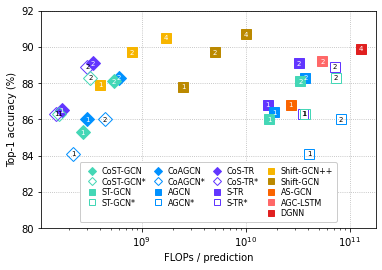

In [3]:
# Plot
fig, ax = plt.subplots(constrained_layout=False)
# fig.set_size_inches(10,8)

# Params
markersize = 10
textsize = 7

for index, row in df.iterrows():
    acc = row["xsub"]
    ax.plot(
        row["flops"], 
        acc, 
        c=row["colour"], 
        label=row["name"],
        marker=row["marker"],
        fillstyle=row["fill"],
        linestyle=" ",
        markersize=markersize,
    )
    
    ax.annotate(
        row["streams"], 
        xy=(row["flops"], acc),
        xytext=(row["flops"], acc),
        ha='center',
        va='center',
        size=textsize,
        color="white" if row["fill"] != "none" else "black"
    )
    
ax.set_ylabel('Top-1 accuracy (%)')
ax.set_xlabel('FLOPs / prediction') 
# ax.set_xlabel('FLOPs per clip ■') 
# secax = ax.secondary_xaxis('top')
# secax.set_xlabel('FLOPs per frame ●')


# General setup

handles, labels = plt.gca().get_legend_handles_labels()
# handles.insert(1, plt.Line2D([],[], alpha=0))
# labels.insert(1,'')
by_label = dict(zip(labels, handles)) # Remove repeat entries



vals = list(by_label.values())[::-1],
vals[0].insert(4, plt.Line2D([],[], alpha=0))
vals[0].insert(9, plt.Line2D([],[], alpha=0))
vals[0].insert(14, plt.Line2D([],[], alpha=0))
# keys = list(by_label.keys())[::-1],
# X = np.linspace(0,100,11)
# vals[0].insert(3, plt.Line2D(np.linspace(0,1,10),np.linspace(0,1,10), linestyle='none', marker='none'))
# keys[0].insert(3, "")

legend = plt.legend(
    handles=vals[0],
    loc="lower center", 
    framealpha=1.0, 
    borderpad=0.5, 
    markerscale=0.6,
    scatterpoints=1, 
    ncol=4,
    columnspacing=0.5,
    labelspacing=0.2,
    handletextpad=0.2,
    prop={'size': markersize-2},
    bbox_to_anchor=[0.0,0.01,1,1]
) 

ax.set_xscale('log'); 
# plt.xlim([1e8, 1e13])
# plt.ylim([89, 97])
plt.ylim([80, 92])
plt.grid(linestyle='dotted')
plt.show()

In [4]:
fig.savefig("xsub-acc-vs-flops-log.pdf")